# Increasing Shared Memory

In [1]:
import os
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier

shared_directory_path = 'capacityData'
shared_paths = []

# List all files in the directory
for filename in os.listdir(shared_directory_path):
  if filename == '.DS_Store':
    continue
  file_path = os.path.join(shared_directory_path, filename)
  if os.path.isfile(file_path):
      shared_paths.append(file_path)
shared_paths = sorted(shared_paths)
no_shared_path = 'NoSharedData/LxavierNoSharedTwelve12th.csv'

print(shared_paths)
print(no_shared_path)


/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier
['capacityData/AxavierShared25P.csv', 'capacityData/BxavierShared50P.csv', 'capacityData/CxavierShared75P.csv', 'capacityData/DxavierShared100P.csv']
NoSharedData/LxavierNoSharedTwelve12th.csv


### Load in the data

In [2]:
# Load all of the preemption intervals from the shared memory tests into an array 

# for noSharedPath, sharedPath in zip(no_shared_paths, shared_paths):
import numpy as np
%cd ~/Desktop/Research/GPU-research/Preemptions
from analyzer_functions import *
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier
shared_ivls_array = []
for shared_path in shared_paths:
  shared_data, shared_ivls = data_loader(singlePath=shared_path, single=True)
  # convert to microseconds
  shared_ivls = np.array(shared_ivls) / 1000
  shared_ivls_array.append(shared_ivls)

# Load in the no shared data
no_shared_data, no_shared_ivls = data_loader(singlePath=no_shared_path, single=True)
no_shared_ivls = np.array(no_shared_ivls) / 1000

/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier


## Plot the median intervals

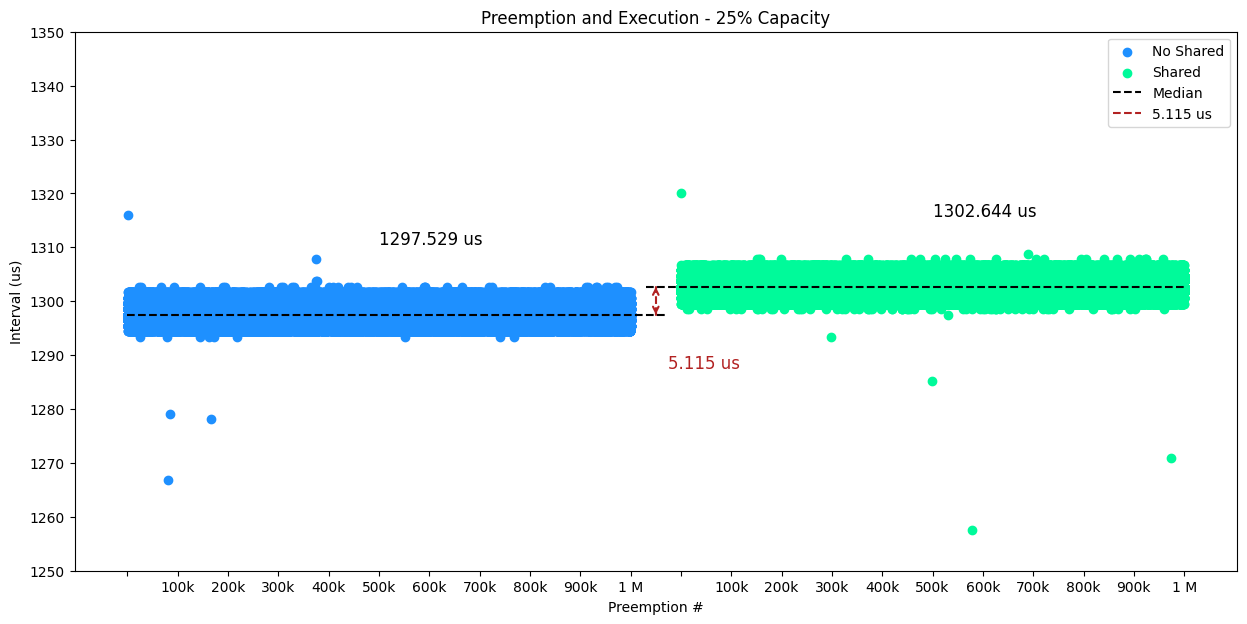

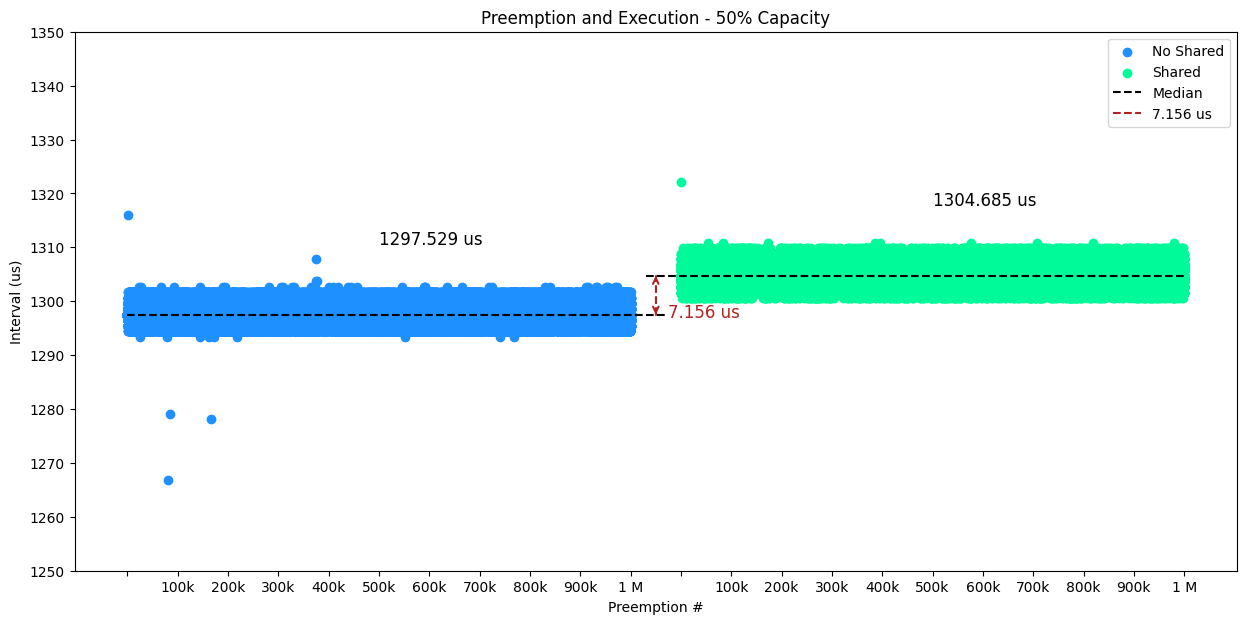

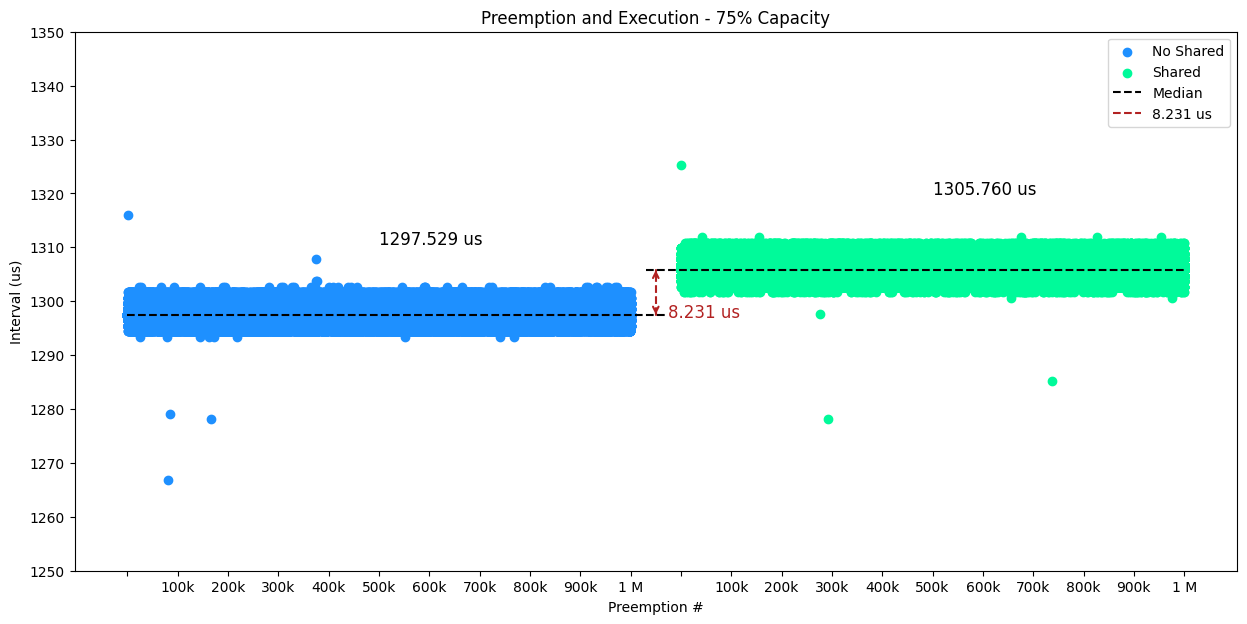

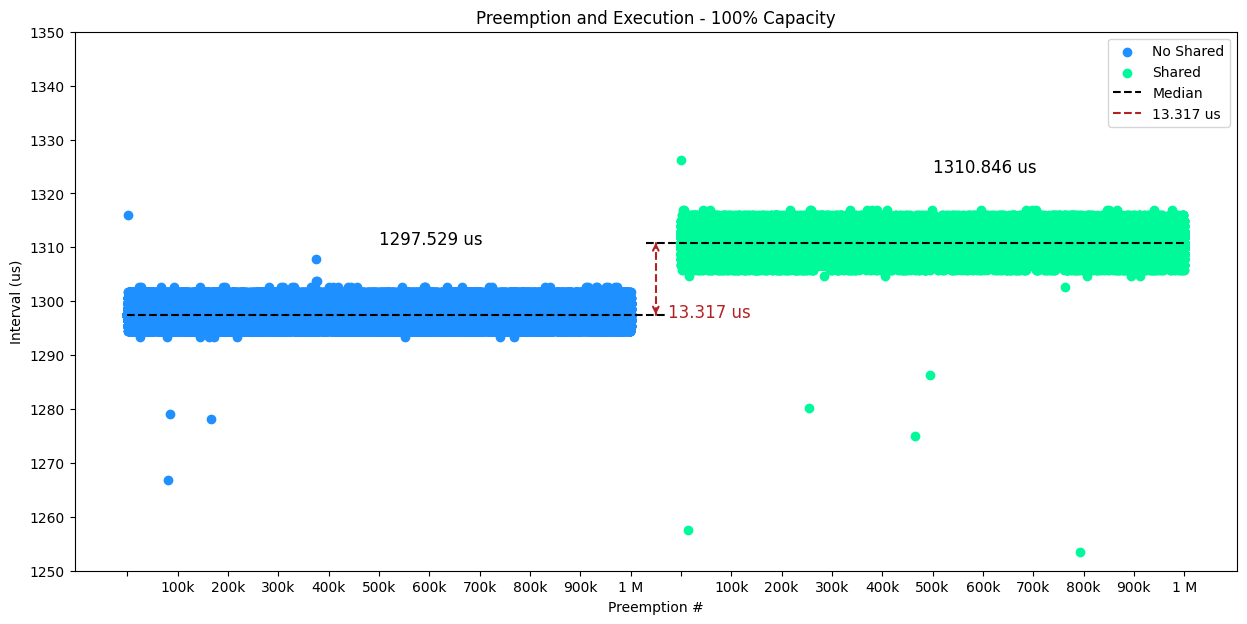

In [3]:
NUM_SAMPLES = 1000000
offset = NUM_SAMPLES // 10
percentages = [25, 50, 75, 100]
for shared_ivls, per in zip(shared_ivls_array, percentages):
  plot_side_by_side(noSharedData=no_shared_ivls, sharedData=shared_ivls, NUM_SAMPLES=NUM_SAMPLES, 
    firstLabel='No Shared', secondLabel='Shared', lowerBound=1250, upperBound=1350, medianLines=True, offset=offset, perCap=per, medianOffset=10, medianImpute=True)

## Plot the typical worst-case bounds

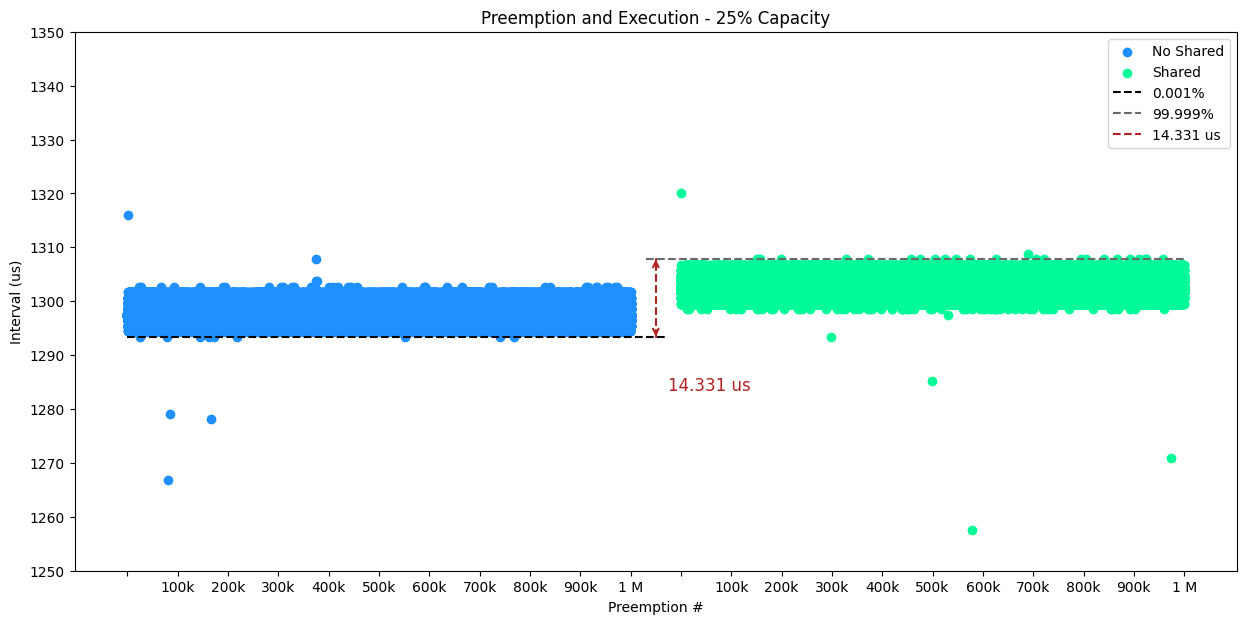

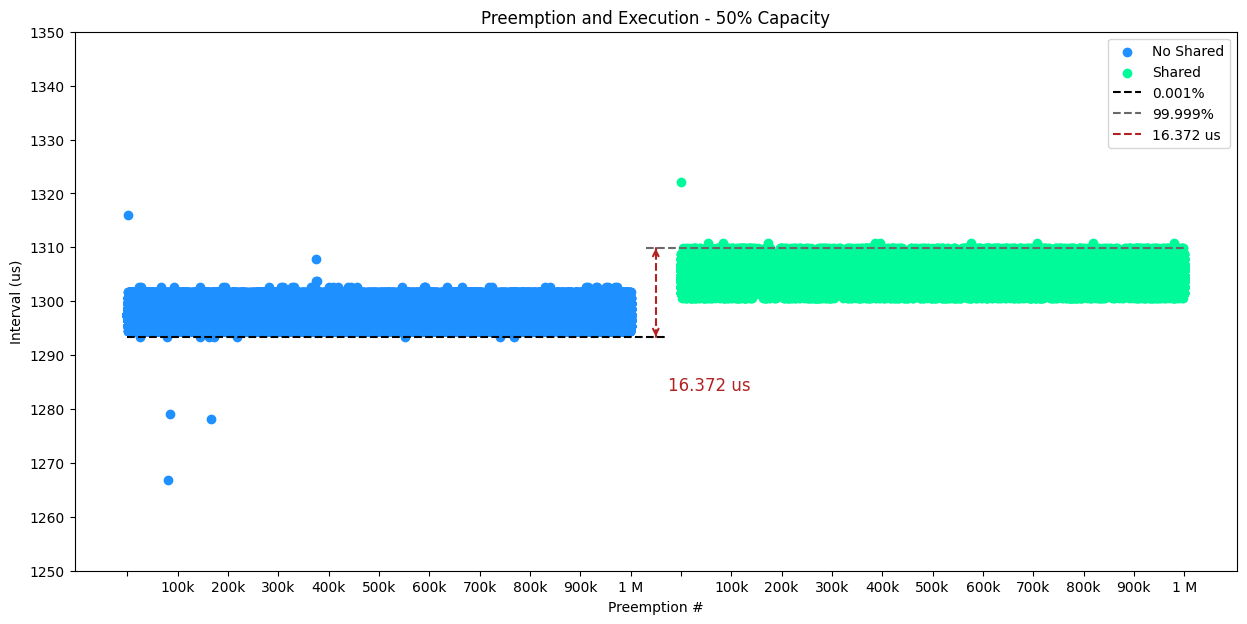

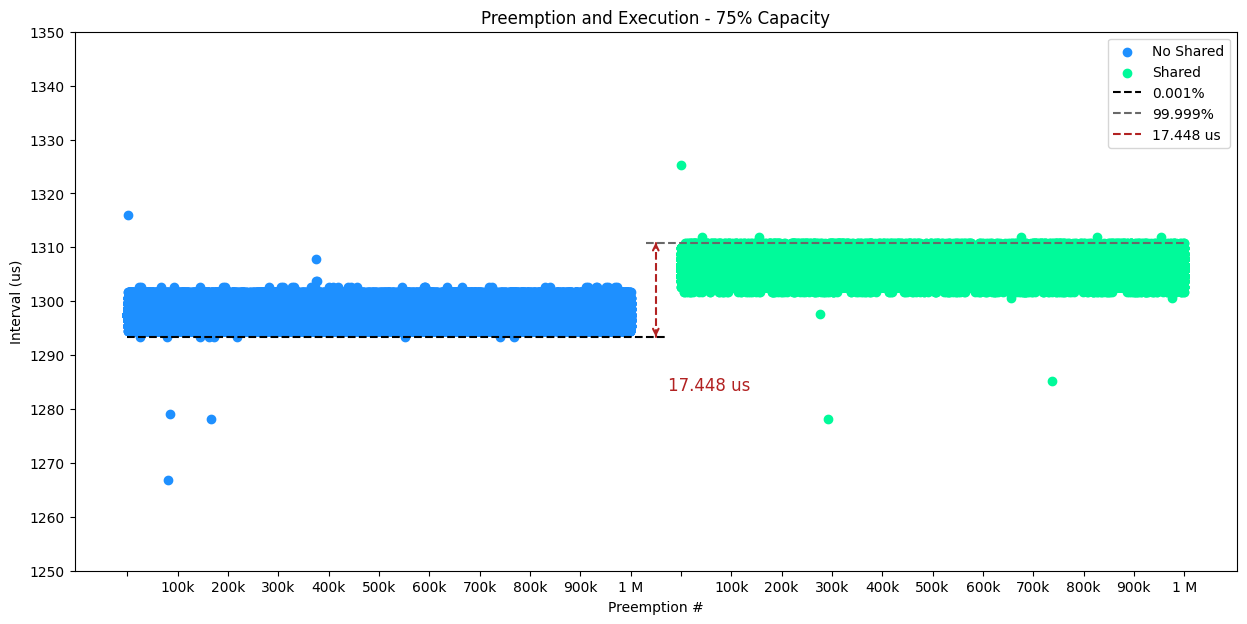

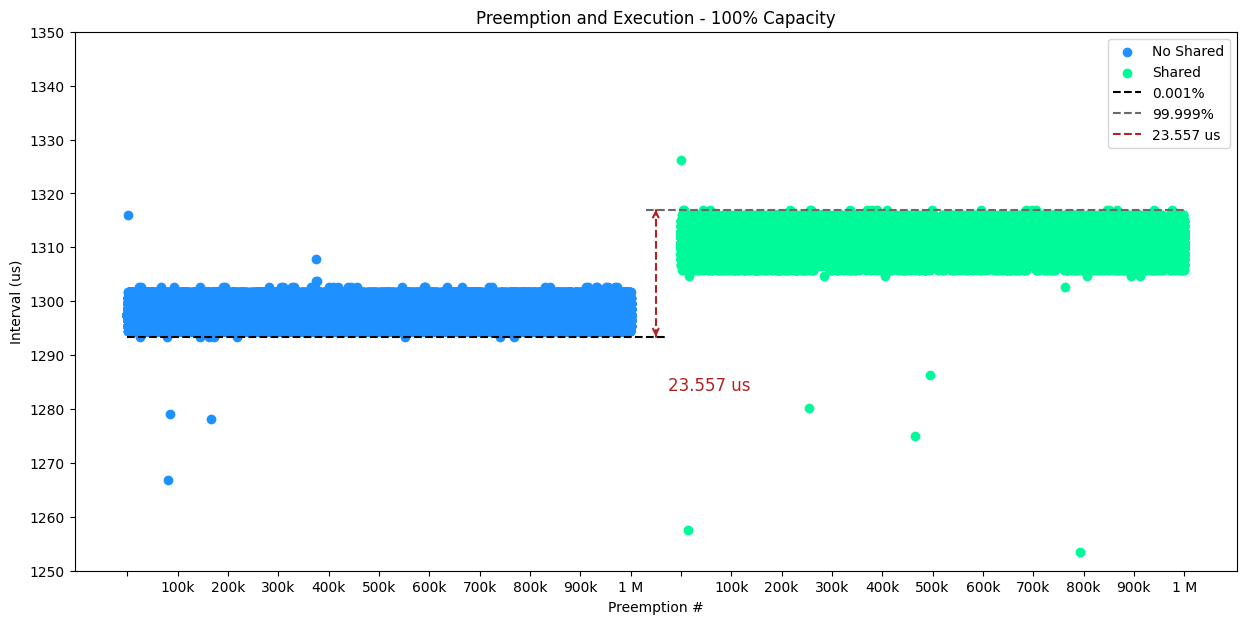

In [4]:
for shared_ivls, per in zip(shared_ivls_array, percentages):
  plot_side_by_side(noSharedData=no_shared_ivls, sharedData=shared_ivls, NUM_SAMPLES=NUM_SAMPLES, 
    firstLabel='No Shared', secondLabel='Shared', lowerBound=1250, upperBound=1350, worstCaseLines=True, medianImpute=True, percent=99.999, offset=offset, perCap=per)

## Plot the variational bounds for each trial

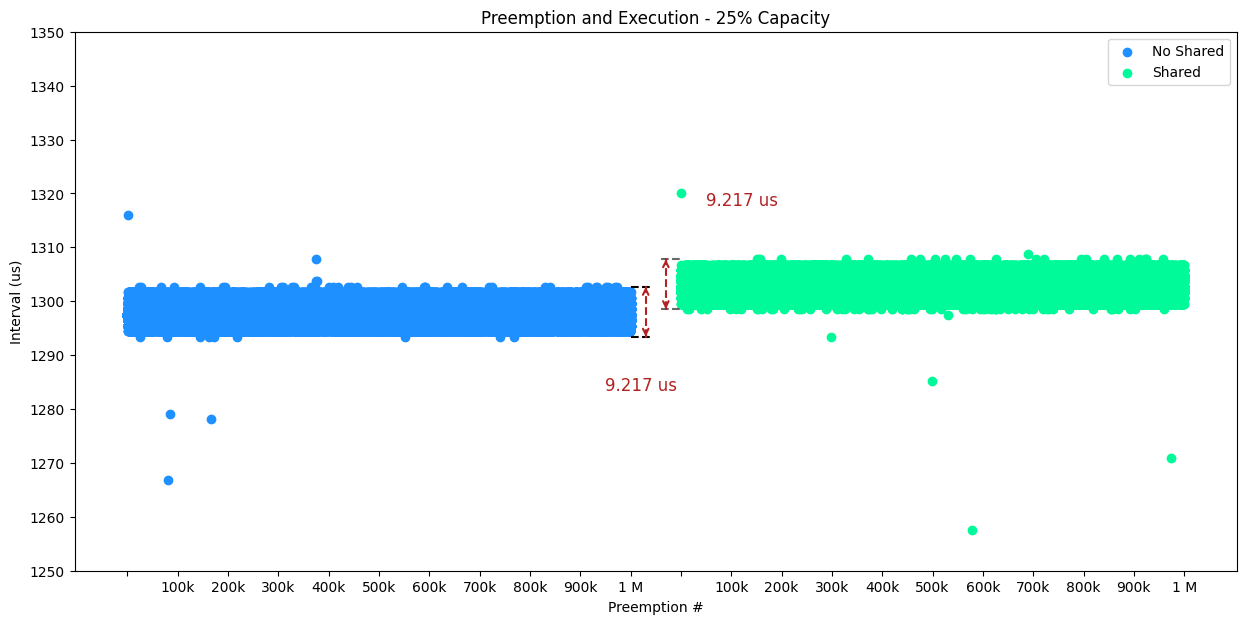

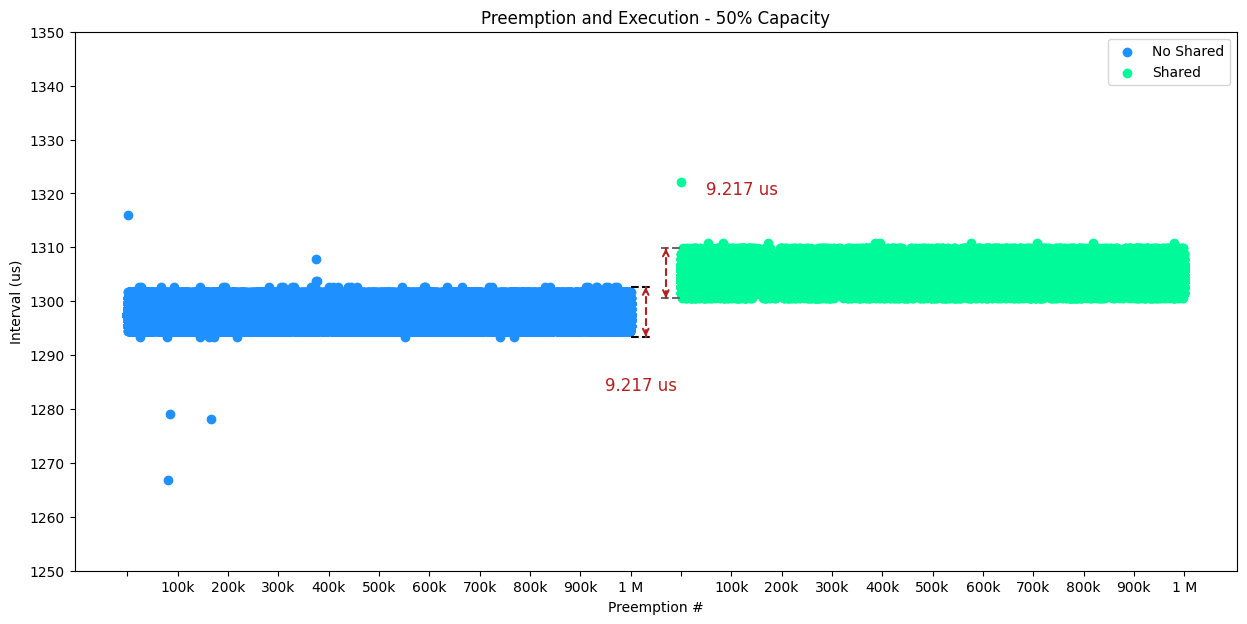

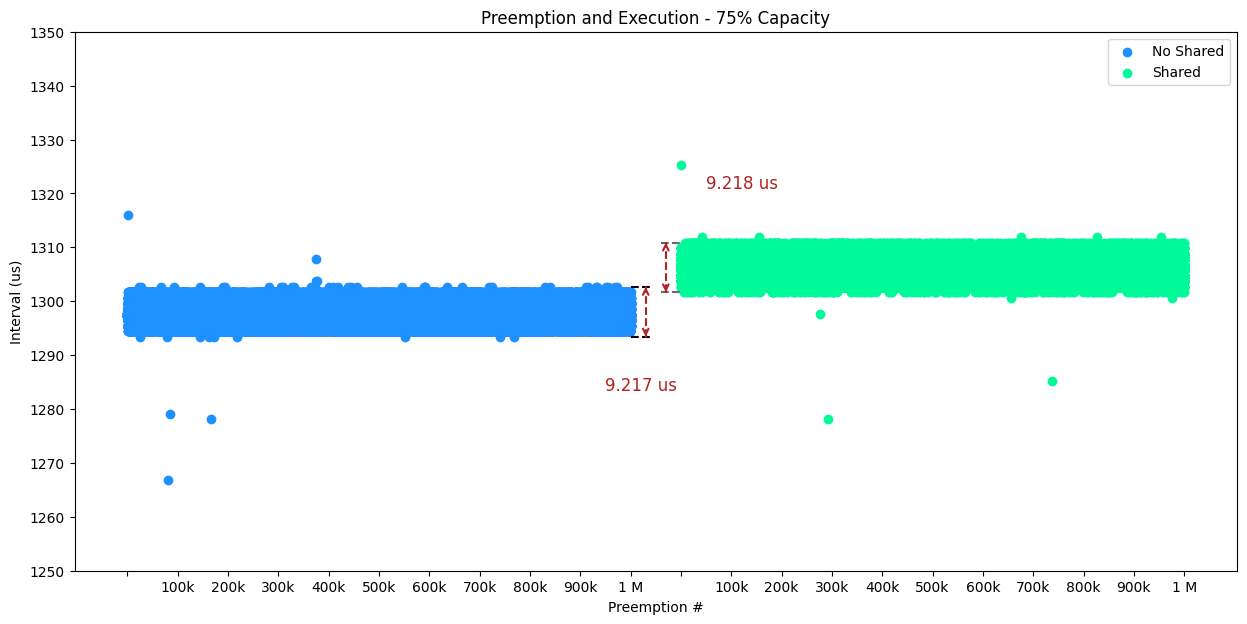

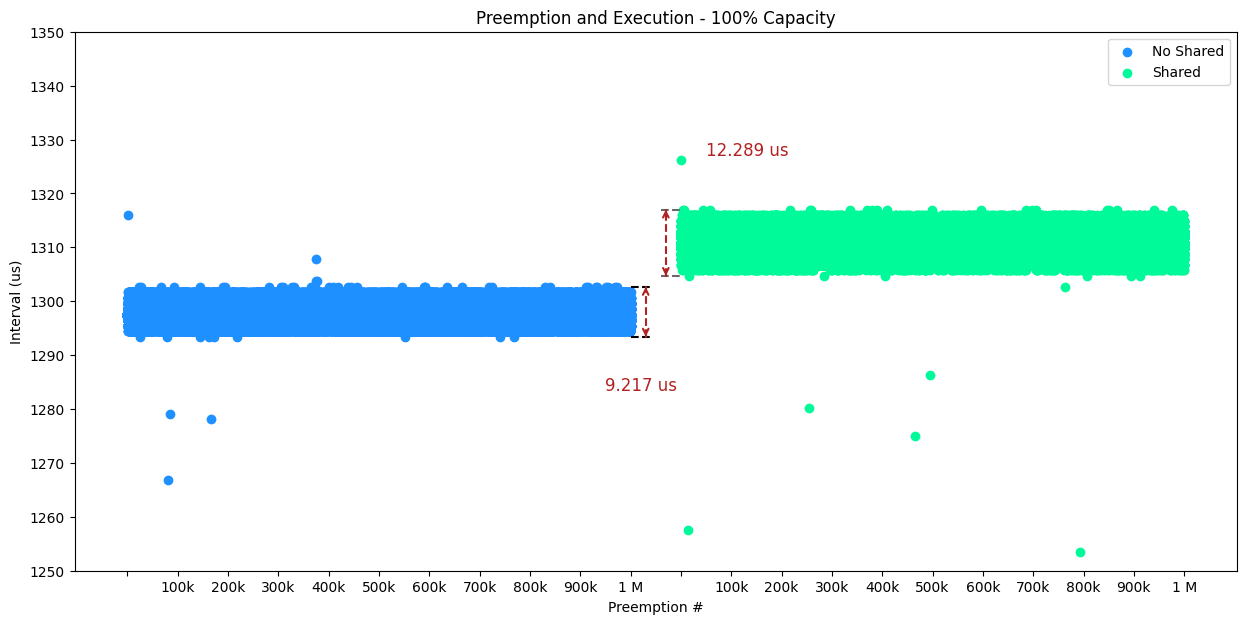

In [5]:
for shared_ivls, per in zip(shared_ivls_array, percentages):
  plot_side_by_side(noSharedData=no_shared_ivls, sharedData=shared_ivls, NUM_SAMPLES=NUM_SAMPLES, 
    firstLabel='No Shared', secondLabel='Shared', lowerBound=1250, upperBound=1350, blockLines=True, medianImpute=True, offset=offset, blockOffset=100000, percent=99.999, perCap=per)